# CSI4142 - Group 48 - Assignment 2 Part 2 - Imputation Methods 

---

Justin Wang | 300234186
<br>
Ali Bhangu | 300234254

---
Within this notebook is part two of Assignment 2 for CSI4142. In this part of the assignment we have devised an experiment that will perform 3 imputation tests, each test is structured as followed: 

1. An attribute is chosen on which to test the imputation method. 
2. Missing values are simulated by removing some vlaues on the specified attribute in the dataset. 
3. Run the programmed imputation approach for replacing the missing values. 
4. Evaluation of the results of our approach. 


### The 3 Imputation Methods we have chosen are: 
1. Default Value Imputation
2. Correlation Value Imputation
3. Regression Value Imputation
<br>

---

In [51]:
# Importing the required Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os as os
from sklearn.linear_model import LinearRegression
import seaborn as sns

df = pd.read_csv("Housing.csv")  # Make sure the file is in the same directory

In [ ]:
#Download Function for the Housing Dataset

# Define paths
zip_path = "housing-prices-dataset.zip"
csv_path = "Housing.csv"

# Delete existing CSV if present
if os.path.exists(csv_path):
    print(f"Existing {csv_path} found. Deleting and re-extracting...")
    os.remove(csv_path)

# Download dataset using curl (Bash command in Jupyter Notebook)
!curl -L -o {zip_path} https://www.kaggle.com/api/v1/datasets/download/yasserh/housing-prices-dataset

# Extract the ZIP file in the current folder
print("Extracting dataset...")
!unzip -o {zip_path} -d .

# Verify that the CSV exists after extraction
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"Dataset not found: {csv_path}. Ensure the ZIP file was correctly extracted.")

# Load dataset
df = pd.read_csv(csv_path)
print("Dataset loaded successfully.")
df.head()

Existing Housing.csv found. Deleting and re-extracting...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10027    0 10027    0     0  29672      0 --:--:-- --:--:-- --:--:-- 29753
Extracting dataset...
Archive:  housing-prices-dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of housing-prices-dataset.zip or
        housing-prices-dataset.zip.zip, and cannot find housing-prices-dataset.zip.ZIP, period.


FileNotFoundError: Dataset not found: Housing.csv. Ensure the ZIP file was correctly extracted.


## Default Value Imputation

For our first imputation method, we plan to utilize Missing Completely at Random (MCAR) to modify our dataframe and remove data entires. Below you will find our in-depth experiment. 

Default value imputation is when you replace the missing values in a table with the mean, median or mode of the respective feature. In our case, we chose to replace the missing values with the **MEAN**.

### a) We will test our imputation on the *Price* value

In [139]:
print("=== Original Data (first 20, middle 20, end 20) ===")

mid = len(df) // 2

display(df.head(20))
display(df.iloc[mid - 10 : mid + 10])
display(df.tail(20))

=== Original Data (first 20, middle 20, end 20) ===


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
262,4445000,3750,2,1,1,yes,yes,yes,no,no,0,no,semi-furnished
263,4410000,3968,3,1,2,no,no,no,no,no,0,no,semi-furnished
264,4410000,4900,2,1,2,yes,no,yes,no,no,0,no,semi-furnished
265,4403000,2880,3,1,2,yes,no,no,no,no,0,yes,semi-furnished
266,4403000,4880,3,1,1,yes,no,no,no,no,2,yes,unfurnished
267,4403000,4920,3,1,2,yes,no,no,no,no,1,no,semi-furnished
268,4382000,4950,4,1,2,yes,no,no,no,yes,0,no,semi-furnished
269,4375000,3900,3,1,2,yes,no,no,no,no,0,no,unfurnished
270,4340000,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
271,4340000,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
525,2345000,3640,2,1,1,yes,no,no,no,no,0,no,unfurnished
526,2310000,3180,2,1,1,yes,no,no,no,no,0,no,unfurnished
527,2275000,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished
528,2275000,3970,1,1,1,no,no,no,no,no,0,no,unfurnished
529,2275000,3970,3,1,2,yes,no,yes,no,no,0,no,unfurnished
530,2240000,1950,3,1,1,no,no,no,yes,no,0,no,unfurnished
531,2233000,5300,3,1,1,no,no,no,no,yes,0,yes,unfurnished
532,2135000,3000,2,1,1,no,no,no,no,no,0,no,unfurnished
533,2100000,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished
534,2100000,3000,4,1,2,yes,no,no,no,no,0,no,unfurnished


### b) Using MCAR (Missing Completely at Random), we remove 10% of of the values in the attribute

In [140]:
# 2. Simulate missing data in 'price' (MCAR)
df_missing = df.copy()
np.random.seed(0)  # for reproducibility

# Randomly select 10% of rows to set 'price' to NaN
missing_indices = np.random.choice(df_missing.index, size=int(0.1 * len(df_missing)), replace=False)
df_missing.loc[missing_indices, 'price'] = np.nan

print("=== After Removing 10% of 'price' Values (first 20, middle 20, end 20) ===")
display(df_missing.head(20))
display(df_missing.iloc[mid - 10 : mid + 10])
display(df_missing.tail(20))

=== After Removing 10% of 'price' Values (first 20, middle 20, end 20) ===


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000.0,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000.0,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000.0,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000.0,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000.0,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000.0,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000.0,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000.0,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000.0,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
262,4445000.0,3750,2,1,1,yes,yes,yes,no,no,0,no,semi-furnished
263,4410000.0,3968,3,1,2,no,no,no,no,no,0,no,semi-furnished
264,NaN,4900,2,1,2,yes,no,yes,no,no,0,no,semi-furnished
265,4403000.0,2880,3,1,2,yes,no,no,no,no,0,yes,semi-furnished
266,4403000.0,4880,3,1,1,yes,no,no,no,no,2,yes,unfurnished
267,4403000.0,4920,3,1,2,yes,no,no,no,no,1,no,semi-furnished
268,4382000.0,4950,4,1,2,yes,no,no,no,yes,0,no,semi-furnished
269,4375000.0,3900,3,1,2,yes,no,no,no,no,0,no,unfurnished
270,4340000.0,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
271,4340000.0,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
525,2345000.0,3640,2,1,1,yes,no,no,no,no,0,no,unfurnished
526,2310000.0,3180,2,1,1,yes,no,no,no,no,0,no,unfurnished
527,2275000.0,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished
528,2275000.0,3970,1,1,1,no,no,no,no,no,0,no,unfurnished
529,2275000.0,3970,3,1,2,yes,no,yes,no,no,0,no,unfurnished
530,2240000.0,1950,3,1,1,no,no,no,yes,no,0,no,unfurnished
531,2233000.0,5300,3,1,1,no,no,no,no,yes,0,yes,unfurnished
532,2135000.0,3000,2,1,1,no,no,no,no,no,0,no,unfurnished
533,2100000.0,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished
534,2100000.0,3000,4,1,2,yes,no,no,no,no,0,no,unfurnished


### c) We use the Default Value Imputation to find the value of Price

In [141]:
# 3. Prepare for correlation-based imputation
#    - Use rows where 'price' is not missing to compute correlation stats
train_data = df_missing.dropna(subset=['price'])

# Compute mean and std of 'price' (Y) and 'area' (X) using non-missing data
mean_y = train_data['price'].mean()

# 4. Apply the correlation formula to impute missing 'price' values
missing_rows = df_missing['price'].isna()
# For each row with missing price, apply:
# Y_missing = corr * (std_y / std_x) * (area - mean_x) + mean_y
df_missing.loc[missing_rows, 'price'] = (
    mean_y
)

# 5. 'df_missing' now contains imputed 'price' values using the correlation approach
print("=== After Imputing Missing 'price' (first 20, middle 20, end 20) ===")
display(df_missing.head(20))
display(df_missing.iloc[mid - 10 : mid + 10])
display(df_missing.tail(20))


=== After Imputing Missing 'price' (first 20, middle 20, end 20) ===


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.330000e+07,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,1.225000e+07,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1.225000e+07,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1.221500e+07,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,1.141000e+07,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,1.085000e+07,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,1.015000e+07,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,1.015000e+07,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9.870000e+06,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9.800000e+06,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
262,4.445000e+06,3750,2,1,1,yes,yes,yes,no,no,0,no,semi-furnished
263,4.410000e+06,3968,3,1,2,no,no,no,no,no,0,no,semi-furnished
264,4.775118e+06,4900,2,1,2,yes,no,yes,no,no,0,no,semi-furnished
265,4.403000e+06,2880,3,1,2,yes,no,no,no,no,0,yes,semi-furnished
266,4.403000e+06,4880,3,1,1,yes,no,no,no,no,2,yes,unfurnished
267,4.403000e+06,4920,3,1,2,yes,no,no,no,no,1,no,semi-furnished
268,4.382000e+06,4950,4,1,2,yes,no,no,no,yes,0,no,semi-furnished
269,4.375000e+06,3900,3,1,2,yes,no,no,no,no,0,no,unfurnished
270,4.340000e+06,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
271,4.340000e+06,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
525,2.345000e+06,3640,2,1,1,yes,no,no,no,no,0,no,unfurnished
526,2.310000e+06,3180,2,1,1,yes,no,no,no,no,0,no,unfurnished
527,2.275000e+06,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished
528,2.275000e+06,3970,1,1,1,no,no,no,no,no,0,no,unfurnished
529,2.275000e+06,3970,3,1,2,yes,no,yes,no,no,0,no,unfurnished
530,2.240000e+06,1950,3,1,1,no,no,no,yes,no,0,no,unfurnished
531,2.233000e+06,5300,3,1,1,no,no,no,no,yes,0,yes,unfurnished
532,2.135000e+06,3000,2,1,1,no,no,no,no,no,0,no,unfurnished
533,2.100000e+06,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished
534,2.100000e+06,3000,4,1,2,yes,no,no,no,no,0,no,unfurnished


### d) Evaluation of the Default Value Imputation

For our imputation experiement, we displayed a small sample size of 20 rows of values at the head, middle and tail. In these 60 rows shown, the following rows had missing values:

Head:
- Row 15 Price: 9100000
- Row 17 Price: 8960000

Middle:
- Row 264 Price: 4410000
- Row 276 Price: 4305000

Tail:
- Row 537 Price: 1890000

Using the Default Value Imputation, those missing values were all filled with **4.775118e+06 (4775118)**.

By *Cross-validating* the previous values with the imputed values, we see that the values are significantly different at the head and tail ends, but become more accurate around the middle. This makes sense as the imputed value is the average of all prices from a scale of 1 million to 9 million. 

## Correlation Imputation

For our second imputation method, we plan to utilize MAR (Missing at Random) to modify our dataframe and remove data entires. Below you will find our in-depth experiment. 

Correlation Imputation bivariate imputation method (using 2 variables) that uses the 2 values which correlate with each other to fill in missing attribute values. In our case, we will be using **Area** to help determine the **Price** of a given house.

### a) We will test our imputation on the *Price* value

In [142]:
print("=== Original Data (first 20, middle 20, end 20) ===")
mid = len(df) // 2

display(df.head(20))
display(df.iloc[mid - 10 : mid + 10])
display(df.tail(20))

=== Original Data (first 20, middle 20, end 20) ===


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
262,4445000,3750,2,1,1,yes,yes,yes,no,no,0,no,semi-furnished
263,4410000,3968,3,1,2,no,no,no,no,no,0,no,semi-furnished
264,4410000,4900,2,1,2,yes,no,yes,no,no,0,no,semi-furnished
265,4403000,2880,3,1,2,yes,no,no,no,no,0,yes,semi-furnished
266,4403000,4880,3,1,1,yes,no,no,no,no,2,yes,unfurnished
267,4403000,4920,3,1,2,yes,no,no,no,no,1,no,semi-furnished
268,4382000,4950,4,1,2,yes,no,no,no,yes,0,no,semi-furnished
269,4375000,3900,3,1,2,yes,no,no,no,no,0,no,unfurnished
270,4340000,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
271,4340000,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
525,2345000,3640,2,1,1,yes,no,no,no,no,0,no,unfurnished
526,2310000,3180,2,1,1,yes,no,no,no,no,0,no,unfurnished
527,2275000,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished
528,2275000,3970,1,1,1,no,no,no,no,no,0,no,unfurnished
529,2275000,3970,3,1,2,yes,no,yes,no,no,0,no,unfurnished
530,2240000,1950,3,1,1,no,no,no,yes,no,0,no,unfurnished
531,2233000,5300,3,1,1,no,no,no,no,yes,0,yes,unfurnished
532,2135000,3000,2,1,1,no,no,no,no,no,0,no,unfurnished
533,2100000,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished
534,2100000,3000,4,1,2,yes,no,no,no,no,0,no,unfurnished


### b) Using MAR (Missing at Random), we remove the prices on houses who's area is less than the median area of all houses.

In [143]:
# 2. Simulate missing data in 'price' (MCAR)
df_missing = df.copy()
np.random.seed(0)  # for reproducibility

# Randomly select 10% of rows to set 'price' to NaN
median_area = df_missing['area'].median()
print("Median House Area:")
print(median_area)
df_missing.loc[df_missing['area'] < median_area, 'price'] = np.nan

print("=== After Removing 10% of 'price' Values (first 20, middle 20, end 20) ===")
display(df_missing.head(20))
display(df_missing.iloc[mid - 10 : mid + 10])
display(df_missing.tail(20))

Median House Area:
4600.0
=== After Removing 10% of 'price' Values (first 20, middle 20, end 20) ===


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000.0,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000.0,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000.0,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000.0,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000.0,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000.0,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000.0,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000.0,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000.0,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
262,NaN,3750,2,1,1,yes,yes,yes,no,no,0,no,semi-furnished
263,NaN,3968,3,1,2,no,no,no,no,no,0,no,semi-furnished
264,4410000.0,4900,2,1,2,yes,no,yes,no,no,0,no,semi-furnished
265,NaN,2880,3,1,2,yes,no,no,no,no,0,yes,semi-furnished
266,4403000.0,4880,3,1,1,yes,no,no,no,no,2,yes,unfurnished
267,4403000.0,4920,3,1,2,yes,no,no,no,no,1,no,semi-furnished
268,4382000.0,4950,4,1,2,yes,no,no,no,yes,0,no,semi-furnished
269,NaN,3900,3,1,2,yes,no,no,no,no,0,no,unfurnished
270,NaN,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
271,NaN,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
525,NaN,3640,2,1,1,yes,no,no,no,no,0,no,unfurnished
526,NaN,3180,2,1,1,yes,no,no,no,no,0,no,unfurnished
527,NaN,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished
528,NaN,3970,1,1,1,no,no,no,no,no,0,no,unfurnished
529,NaN,3970,3,1,2,yes,no,yes,no,no,0,no,unfurnished
530,NaN,1950,3,1,1,no,no,no,yes,no,0,no,unfurnished
531,2233000.0,5300,3,1,1,no,no,no,no,yes,0,yes,unfurnished
532,NaN,3000,2,1,1,no,no,no,no,no,0,no,unfurnished
533,NaN,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished
534,NaN,3000,4,1,2,yes,no,no,no,no,0,no,unfurnished


### c) We use Correlation Imputation to find the missing values of Price

In [144]:
# 3. Prepare for correlation-based imputation
#    - Use rows where 'price' is not missing to compute correlation stats
train_data = df_missing.dropna(subset=['price'])

# Compute Pearson correlation between 'price' and 'area'
corr = train_data[['price', 'area']].corr().loc['price', 'area']

# Compute mean and std of 'price' (Y) and 'area' (X) using non-missing data
mean_y = train_data['price'].mean()
std_y  = train_data['price'].std()
mean_x = train_data['area'].mean()
std_x  = train_data['area'].std()

# 4. Apply the correlation formula to impute missing 'price' values
missing_rows = df_missing['price'].isna()
# For each row with missing price, apply:
# Y_missing = corr * (std_y / std_x) * (area - mean_x) + mean_y
df_missing.loc[missing_rows, 'price'] = (
    corr * (std_y / std_x) * (df_missing.loc[missing_rows, 'area'] - mean_x) 
    + mean_y
)

# 5. 'df_missing' now contains imputed 'price' values using the correlation approach
print("=== After Imputing Missing 'price' (first 20, middle 20, end 20) ===")
display(df_missing.head(20))
display(df_missing.iloc[mid - 10 : mid + 10])
display(df_missing.tail(20))

=== After Imputing Missing 'price' (first 20, middle 20, end 20) ===


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.330000e+07,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,1.225000e+07,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1.225000e+07,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1.221500e+07,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,1.141000e+07,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,1.085000e+07,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,1.015000e+07,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,1.015000e+07,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9.870000e+06,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9.800000e+06,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
262,4.976962e+06,3750,2,1,1,yes,yes,yes,no,no,0,no,semi-furnished
263,5.031689e+06,3968,3,1,2,no,no,no,no,no,0,no,semi-furnished
264,4.410000e+06,4900,2,1,2,yes,no,yes,no,no,0,no,semi-furnished
265,4.758557e+06,2880,3,1,2,yes,no,no,no,no,0,yes,semi-furnished
266,4.403000e+06,4880,3,1,1,yes,no,no,no,no,2,yes,unfurnished
267,4.403000e+06,4920,3,1,2,yes,no,no,no,no,1,no,semi-furnished
268,4.382000e+06,4950,4,1,2,yes,no,no,no,yes,0,no,semi-furnished
269,5.014619e+06,3900,3,1,2,yes,no,no,no,no,0,no,unfurnished
270,5.165243e+06,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
271,4.513792e+06,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
525,4.949348e+06,3640,2,1,1,yes,no,no,no,no,0,no,unfurnished
526,4.833869e+06,3180,2,1,1,yes,no,no,no,no,0,no,unfurnished
527,4.496470e+06,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished
528,5.032191e+06,3970,1,1,1,no,no,no,no,no,0,no,unfurnished
529,5.032191e+06,3970,3,1,2,yes,no,yes,no,no,0,no,unfurnished
530,4.525089e+06,1950,3,1,1,no,no,no,yes,no,0,no,unfurnished
531,2.233000e+06,5300,3,1,1,no,no,no,no,yes,0,yes,unfurnished
532,4.788682e+06,3000,2,1,1,no,no,no,no,no,0,no,unfurnished
533,4.638057e+06,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished
534,4.788682e+06,3000,4,1,2,yes,no,no,no,no,0,no,unfurnished


### d) Evaluation of Correlation Imputation

For our imputation experiement, we displayed a small sample size of 20 rows of values at the head, middle and tail. Because we removed the data for prices of houses with areas less than 4600 sqaure feet (the median house area), we have a lot of missing data particularly at the end of the list.

Using the Correlation Imputation, we filled in those values using the *linear correlation formula*.

By *visually inspecting* the difference between the unaltered and imputed data using a **scatter plot** graph (seen below), we can see how the formula calculated the values. 

**The Original**:
The unaltered data shows a general trend upward in price as area goes up. 

**The Imputation Data**:
This graph shows the upward trend line discussed above for the houses with less than the median area. It's not accurate to the actual prices, far from it, but it shows a clear predictive line of how prices will trend upward with the existing data.

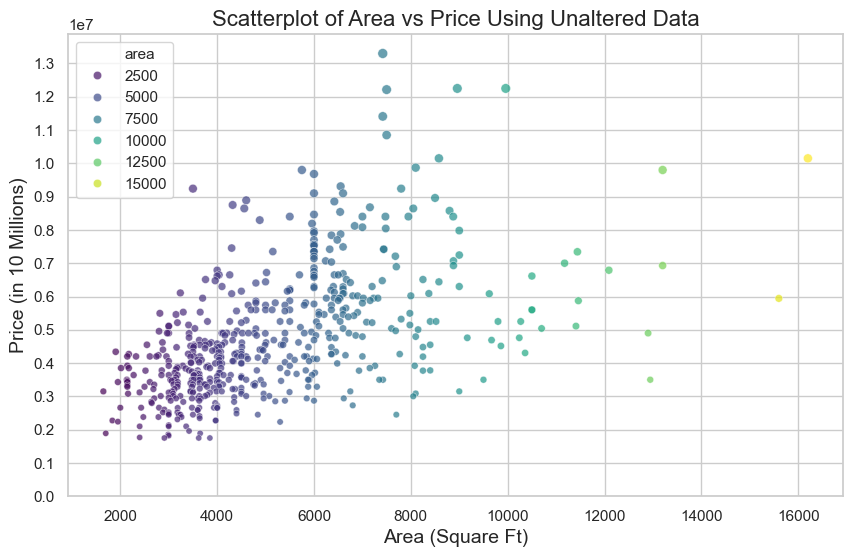

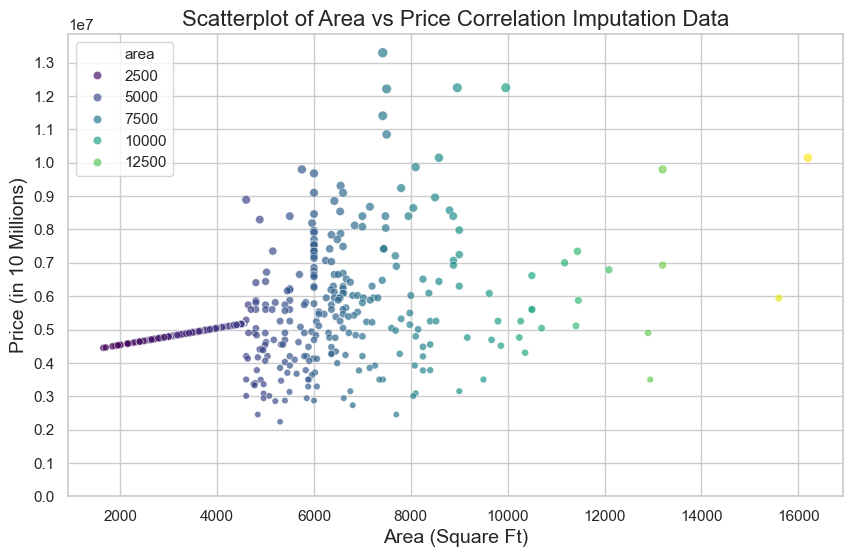

In [145]:
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", as_cmap=True)

# Create a scatterplot for Area vs Price of Unaltered Data
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='area', y='price', data=df,
                          hue='area', size='price', sizes=(20, 50),
                          palette=palette, alpha=0.7)
plt.title('Scatterplot of Area vs Price Using Unaltered Data', fontsize=16)
plt.xlabel('Area (Square Ft)', fontsize=14)
plt.ylabel('Price (in 10 Millions)', fontsize=14)

# Tweaking the labels for the legend. 
handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    handles=handles[:len(labels)//2],  # Only keep the area (hue) entries
    loc='upper left'
)
scatter.set_yticks(range(0, 13300000, 1000000)) # Adjust as necessary for better visualization
plt.grid(True)
plt.show()

# Create a scatterplot for Area vs Price with the Correlation Imputation data
plt.figure(figsize=(10, 6))
scatter2 = sns.scatterplot(x='area', y='price', data=df_missing,
                          hue='area', size='price', sizes=(20, 50),
                          palette=palette, alpha=0.7)
plt.title('Scatterplot of Area vs Price Correlation Imputation Data', fontsize=16)
plt.xlabel('Area (Square Ft)', fontsize=14)
plt.ylabel('Price (in 10 Millions)', fontsize=14)

# Tweaking the labels for the legend. 
handles, labels = scatter2.get_legend_handles_labels()
plt.legend(
    handles=handles[:len(labels)//2],  # Only keep the Age (hue) entries
    loc='upper left'
)
scatter2.set_yticks(range(0, 13300000, 1000000)) # Adjust as necessary for better visualization
plt.grid(True)
plt.show()

## Regression Imputation

For our third imputation method, we plan to utilize Missing Completely at Random (MCAR) to modify our dataframe and remove data entires. Below you will find our in-depth experiment. 

Regression Imputation is a multivariate imputation method (mutliple variable) that utilizes other attributes in a regression model to predict the missing value of an attribute. We will be using price, bedrooms, bathrooms, stories, parking to find the value of **AREA**

### a) We will test our imputation on the *Area* value

In [146]:
# 1. Load the dataset and display original data (first 20, middle 20, end 20)
print("=== Original Data (first 20, middle 20, end 20) ===")
mid = len(df) // 2

display(df.head(20))
display(df.iloc[mid - 10 : mid + 10])
display(df.tail(20))

=== Original Data (first 20, middle 20, end 20) ===


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
262,4445000,3750,2,1,1,yes,yes,yes,no,no,0,no,semi-furnished
263,4410000,3968,3,1,2,no,no,no,no,no,0,no,semi-furnished
264,4410000,4900,2,1,2,yes,no,yes,no,no,0,no,semi-furnished
265,4403000,2880,3,1,2,yes,no,no,no,no,0,yes,semi-furnished
266,4403000,4880,3,1,1,yes,no,no,no,no,2,yes,unfurnished
267,4403000,4920,3,1,2,yes,no,no,no,no,1,no,semi-furnished
268,4382000,4950,4,1,2,yes,no,no,no,yes,0,no,semi-furnished
269,4375000,3900,3,1,2,yes,no,no,no,no,0,no,unfurnished
270,4340000,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
271,4340000,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
525,2345000,3640,2,1,1,yes,no,no,no,no,0,no,unfurnished
526,2310000,3180,2,1,1,yes,no,no,no,no,0,no,unfurnished
527,2275000,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished
528,2275000,3970,1,1,1,no,no,no,no,no,0,no,unfurnished
529,2275000,3970,3,1,2,yes,no,yes,no,no,0,no,unfurnished
530,2240000,1950,3,1,1,no,no,no,yes,no,0,no,unfurnished
531,2233000,5300,3,1,1,no,no,no,no,yes,0,yes,unfurnished
532,2135000,3000,2,1,1,no,no,no,no,no,0,no,unfurnished
533,2100000,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished
534,2100000,3000,4,1,2,yes,no,no,no,no,0,no,unfurnished


### b) Using MCAR (Missing Completely at Random), we remove 10% of of the values in the attribute

In [147]:
# 2. Simulate missing data in 'area' (MCAR)
df_missing_area = df.copy()
np.random.seed(42)  # for reproducibility

# Randomly select 10% of the rows to set 'area' as missing
missing_indices = np.random.choice(df_missing_area.index, size=int(0.1 * len(df_missing_area)), replace=False)
df_missing_area.loc[missing_indices, 'area'] = np.nan

print("=== After Removing 10% of 'area' Values (first 20, middle 20, end 20) ===")
display(df_missing_area.head(20))
display(df_missing_area.iloc[mid - 10 : mid + 10])
display(df_missing_area.tail(20))

=== After Removing 10% of 'area' Values (first 20, middle 20, end 20) ===


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,NaN,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500.0,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,NaN,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200.0,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100.0,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750.0,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
262,4445000,3750.0,2,1,1,yes,yes,yes,no,no,0,no,semi-furnished
263,4410000,3968.0,3,1,2,no,no,no,no,no,0,no,semi-furnished
264,4410000,4900.0,2,1,2,yes,no,yes,no,no,0,no,semi-furnished
265,4403000,2880.0,3,1,2,yes,no,no,no,no,0,yes,semi-furnished
266,4403000,4880.0,3,1,1,yes,no,no,no,no,2,yes,unfurnished
267,4403000,4920.0,3,1,2,yes,no,no,no,no,1,no,semi-furnished
268,4382000,4950.0,4,1,2,yes,no,no,no,yes,0,no,semi-furnished
269,4375000,3900.0,3,1,2,yes,no,no,no,no,0,no,unfurnished
270,4340000,4500.0,3,2,3,yes,no,no,yes,no,1,no,furnished
271,4340000,1905.0,5,1,2,no,no,yes,no,no,0,no,semi-furnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
525,2345000,3640.0,2,1,1,yes,no,no,no,no,0,no,unfurnished
526,2310000,3180.0,2,1,1,yes,no,no,no,no,0,no,unfurnished
527,2275000,1836.0,2,1,1,no,no,yes,no,no,0,no,semi-furnished
528,2275000,3970.0,1,1,1,no,no,no,no,no,0,no,unfurnished
529,2275000,NaN,3,1,2,yes,no,yes,no,no,0,no,unfurnished
530,2240000,1950.0,3,1,1,no,no,no,yes,no,0,no,unfurnished
531,2233000,5300.0,3,1,1,no,no,no,no,yes,0,yes,unfurnished
532,2135000,3000.0,2,1,1,no,no,no,no,no,0,no,unfurnished
533,2100000,2400.0,3,1,2,yes,no,no,no,no,0,no,unfurnished
534,2100000,3000.0,4,1,2,yes,no,no,no,no,0,no,unfurnished


### c) We use the Regression Imputation to find the value of Area

In [148]:
# 3. Regression imputation on 'area'
#    a. Use rows with non-missing 'area' values for training
train_data = df_missing_area.dropna(subset=['area'])
# Use numerical predictors: price, bedrooms, bathrooms, stories, parking
X_train = train_data[['price', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y_train = train_data['area']

# Train a linear regression model to predict area
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

#    b. Predict missing 'area' values
missing_rows = df_missing_area['area'].isna()
X_missing = df_missing_area.loc[missing_rows, ['price', 'bedrooms', 'bathrooms', 'stories', 'parking']]

predicted_area = reg_model.predict(X_missing)

#    c. Fill in the missing 'area' values with predictions
df_missing_area.loc[missing_rows, 'area'] = predicted_area

df_missing_area['area'] = df_missing_area['area'].round(1)

print("=== After Regression Imputation for 'area' (first 20, middle 20, end 20) ===")
display(df_missing_area.head(20))
display(df_missing_area.iloc[mid - 10 : mid + 10])
display(df_missing_area.tail(20))

=== After Regression Imputation for 'area' (first 20, middle 20, end 20) ===


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,10246.1,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500.0,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,7798.6,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200.0,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100.0,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750.0,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
262,4445000,3750.0,2,1,1,yes,yes,yes,no,no,0,no,semi-furnished
263,4410000,3968.0,3,1,2,no,no,no,no,no,0,no,semi-furnished
264,4410000,4900.0,2,1,2,yes,no,yes,no,no,0,no,semi-furnished
265,4403000,2880.0,3,1,2,yes,no,no,no,no,0,yes,semi-furnished
266,4403000,4880.0,3,1,1,yes,no,no,no,no,2,yes,unfurnished
267,4403000,4920.0,3,1,2,yes,no,no,no,no,1,no,semi-furnished
268,4382000,4950.0,4,1,2,yes,no,no,no,yes,0,no,semi-furnished
269,4375000,3900.0,3,1,2,yes,no,no,no,no,0,no,unfurnished
270,4340000,4500.0,3,2,3,yes,no,no,yes,no,1,no,furnished
271,4340000,1905.0,5,1,2,no,no,yes,no,no,0,no,semi-furnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
525,2345000,3640.0,2,1,1,yes,no,no,no,no,0,no,unfurnished
526,2310000,3180.0,2,1,1,yes,no,no,no,no,0,no,unfurnished
527,2275000,1836.0,2,1,1,no,no,yes,no,no,0,no,semi-furnished
528,2275000,3970.0,1,1,1,no,no,no,no,no,0,no,unfurnished
529,2275000,3259.7,3,1,2,yes,no,yes,no,no,0,no,unfurnished
530,2240000,1950.0,3,1,1,no,no,no,yes,no,0,no,unfurnished
531,2233000,5300.0,3,1,1,no,no,no,no,yes,0,yes,unfurnished
532,2135000,3000.0,2,1,1,no,no,no,no,no,0,no,unfurnished
533,2100000,2400.0,3,1,2,yes,no,no,no,no,0,no,unfurnished
534,2100000,3000.0,4,1,2,yes,no,no,no,no,0,no,unfurnished


### d) Evaluation of Regression Imputation

For our imputation experiement, we displayed a small sample size of 20 rows of values at the head, middle and tail. In these 60 rows shown, the following rows had missing values:

Head:
- Row 2 Area: 9960
- Row 6 Area: 8580
- Row 10 Area: 13200

Tail:
- Row 529 Area: 3970
- Row 538 Area: 3420
- Row 540 Area: 3000

Using the Regression Imputation, those missing values were all filled with:

Head:
- Row 2 Area: 10246.1
- Row 6 Area: 7798.6
- Row 10 Area: 9011.7

Tail:
- Row 529 Area: 3259.7
- Row 538 Area: 3301.3
- Row 540 Area: 3978.2

By *Cross-validating* the previous values with the imputed values, we see that the values are off by 1000+ square feet at the head, but become more accurate around the end.